<a href="https://colab.research.google.com/github/yossef-G/MEMORY-GAME/blob/master/Python_data_analysis_final_2022B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part A: Data processing

#1. Import libraries:

In [1]:
#!pip install yellowbrick

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from yellowbrick.cluster import KElbowVisualizer
%matplotlib inline

#2. Load your csv file:
Enter a string with the name of your data file.
For example:
if your data file is named "data.csv" than enter:
df = pd.read_csv("data.csv")


In [2]:
df = pd.read_csv('/content/neo.csv')

In [3]:
df.head(5)

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [4]:
df.dtypes

id                      int64
name                   object
est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
orbiting_body          object
sentry_object            bool
absolute_magnitude    float64
hazardous                bool
dtype: object

#3. Using the describe and shape methods- display a summary of the data.
#Make sure all columns are displayed in the describe method including the categorical ones.

In [5]:
df.describe(include='all')

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
count,9.083600e+04,90836,90836.000000,90836.000000,90836.000000,9.083600e+04,90836,90836,90836.000000,90836
unique,NaN,27423,NaN,NaN,NaN,NaN,1,1,NaN,2
top,NaN,469219 Kamo`oalewa (2016 HO3),NaN,NaN,NaN,NaN,Earth,False,NaN,False
freq,NaN,43,NaN,NaN,NaN,NaN,90836,90836,NaN,81996
mean,1.438288e+07,NaN,0.127432,0.284947,48066.918918,3.706655e+07,NaN,NaN,23.527103,NaN
std,2.087202e+07,NaN,0.298511,0.667491,25293.296961,2.235204e+07,NaN,NaN,2.894086,NaN
min,2.000433e+06,NaN,0.000609,0.001362,203.346433,6.745533e+03,NaN,NaN,9.230000,NaN
25%,3.448110e+06,NaN,0.019256,0.043057,28619.020645,1.721082e+07,NaN,NaN,21.340000,NaN
50%,3.748362e+06,NaN,0.048368,0.108153,44190.117890,3.784658e+07,NaN,NaN,23.700000,NaN
75%,3.884023e+06,NaN,0.143402,0.320656,62923.604633,5.654900e+07,NaN,NaN,25.700000,NaN


In [6]:
df.shape

(90836, 10)

#4. Using pd.drop, remove all categorical/ID columns.
Remember: if you wish to assign the changes made in your dataframe, than the dataframe should be assigned once again.




In [7]:
df_reduced = df.drop(columns = ['id','name','orbiting_body','sentry_object'])
df_reduced

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True
...,...,...,...,...,...,...
90831,0.026580,0.059435,52078.886692,1.230039e+07,25.00,False
90832,0.016771,0.037501,46114.605073,5.432121e+07,26.00,False
90833,0.031956,0.071456,7566.807732,2.840077e+07,24.60,False
90834,0.007321,0.016370,69199.154484,6.869206e+07,27.80,False


#Part B: matplotlib

#5.Create a histogram:

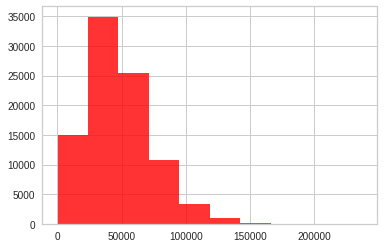

In [8]:
df_reduced['relative_velocity'].hist(color='red',alpha=0.8)

#6. XY scatter and line plot:


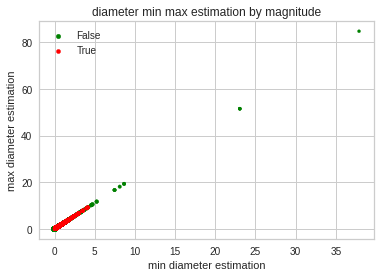

In [9]:
X = df_reduced['est_diameter_min']
Y = df_reduced['est_diameter_max']

fig, ax = plt.subplots()
colors = {True:'red', False:'green'}
for haz in [False,True]:
    ax.scatter(X[df_reduced['hazardous']==haz], Y[df_reduced['hazardous']==haz], s=df['absolute_magnitude'][df_reduced['hazardous']==haz] ,c=colors[haz],label=haz)
ax.set_title('diameter min max estimation by magnitude')
ax.set_xlabel("min diameter estimation")
ax.set_ylabel("max diameter estimation")
ax.legend()

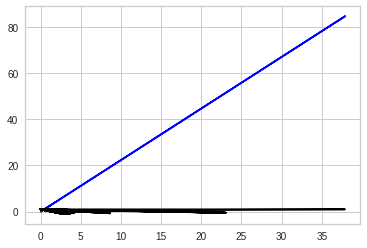

In [10]:
z = np.polyfit(X, Y, 1)
p = np.poly1d(z)
fig, ax = plt.subplots()
ax.plot(X, p(X),color='blue')
ax.plot(X, np.cos(X),color='black')

#7. Create a pairplot:

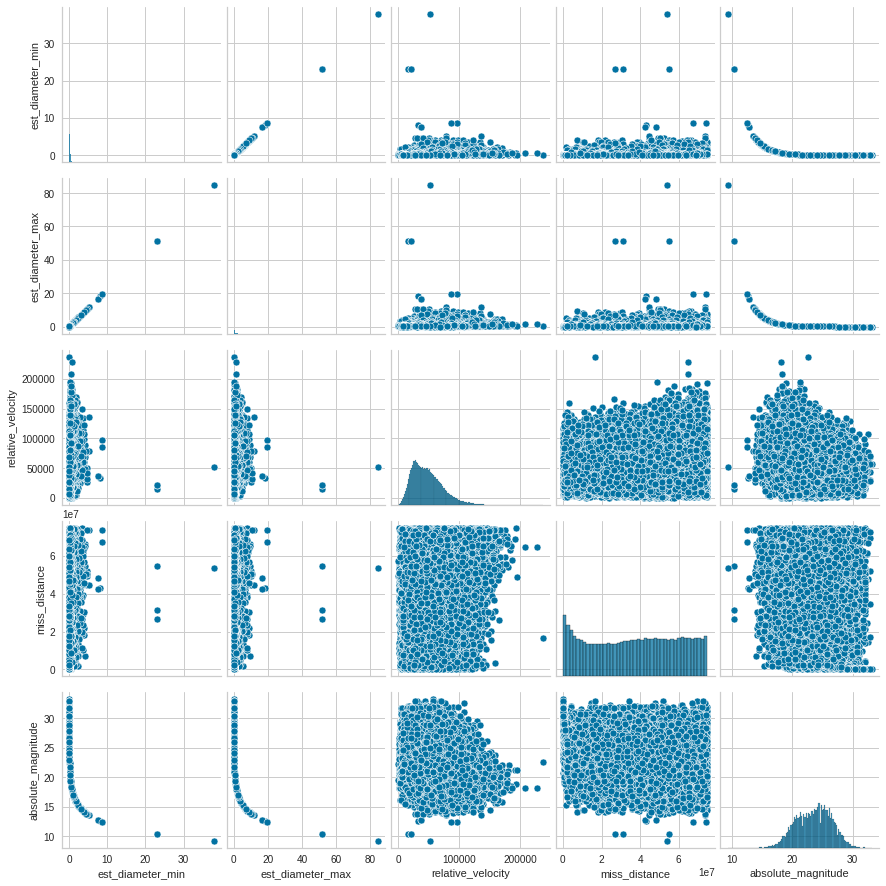

In [11]:
sns.pairplot(df_reduced.drop(columns=['hazardous']))

#your answer here:
we can observe that the estimated diameter (min or max) has reverse correlation with absoulte magnitude then the orbit is estimated to be big, the absoulte magnitude is small

#Part C: unsupervised learning - Kmeans

#8. Create a new dataframe named df_numeric with only numeric (float/int) variables.

In [12]:
df_numeric= df_reduced.drop(columns=['hazardous'])
df_numeric

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09
...,...,...,...,...,...
90831,0.026580,0.059435,52078.886692,1.230039e+07,25.00
90832,0.016771,0.037501,46114.605073,5.432121e+07,26.00
90833,0.031956,0.071456,7566.807732,2.840077e+07,24.60
90834,0.007321,0.016370,69199.154484,6.869206e+07,27.80


#9.Perform K-means algorithm on df_numeric with K=5

In [13]:
kmeans = KMeans(n_clusters=5, random_state=123).fit(df_numeric)
kmeans

KMeans(n_clusters=5, random_state=123)

Text(0.5, 1.0, 'Kmeans - distance to magnitude, K=5')

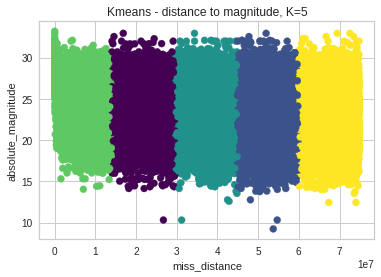

In [14]:
x=df_numeric["miss_distance"]
y=df_numeric["absolute_magnitude"]
plt.scatter(x,y,c=kmeans.labels_,cmap="viridis")
plt.xlabel("miss_distance")
plt.ylabel("absolute_magnitude")
plt.title("Kmeans - distance to magnitude, K=5")


#10. For df_numeric, find the best k between 1-12 using the elbow method:

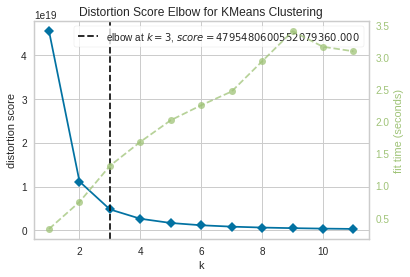

In [15]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(df_numeric)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

#11. Answer to the following questions:


*   What is the best K?
*   How did you find this value?
*   What are the characteristics of good clustering?
*   What does the x-axus mean? what does the y-axis mean?
*   Why does the K in the elbow means the best point in the plot?








#your answer here:
1. k =3
2. using elbow method i found that after 3 clusters the distance between the mean of a cluster and the other data points in the cluster is at its lowest
3. the average distance of every sample to their centroid is low, and high to other centroids
4. x-axis is distortion ( the average distance from the centroid of the respective clusters) lower is better. y-axis is the k which represents the clusters number.
5. this is the point which the distortion is starting to decrease in a linear fashion and the distance between the mean of a cluster and the other data points in the cluster is at its lowest.

#12. For df_numeric, find the best k between 1-12 using the Silhouette method:

For n_clusters = 2 The average silhouette_score is : 0.6299861259986722
For n_clusters = 3 The average silhouette_score is : 0.5994807413891425
For n_clusters = 4 The average silhouette_score is : 0.5824589382923853
For n_clusters = 5 The average silhouette_score is : 0.5703786394567059
For n_clusters = 6 The average silhouette_score is : 0.5619528668918955
For n_clusters = 7 The average silhouette_score is : 0.555322615884751
For n_clusters = 8 The average silhouette_score is : 0.5514100214958707
For n_clusters = 9 The average silhouette_score is : 0.5483479134244821
For n_clusters = 10 The average silhouette_score is : 0.5455932720524448
For n_clusters = 11 The average silhouette_score is : 0.5423628350474781


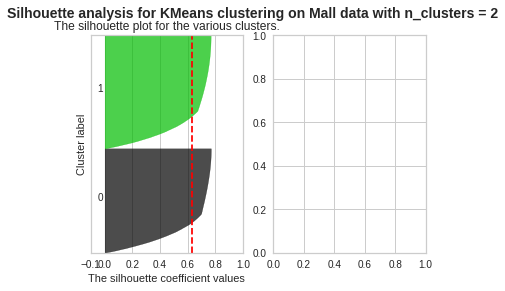

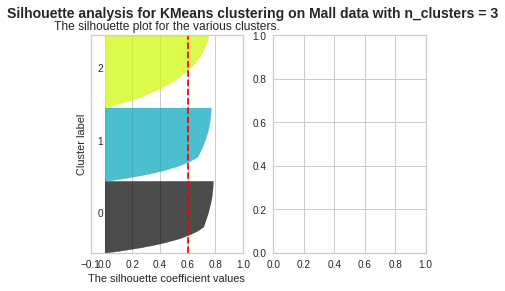

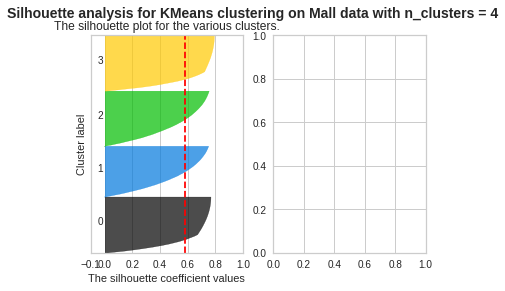

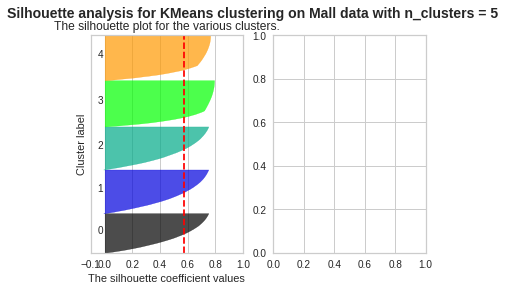

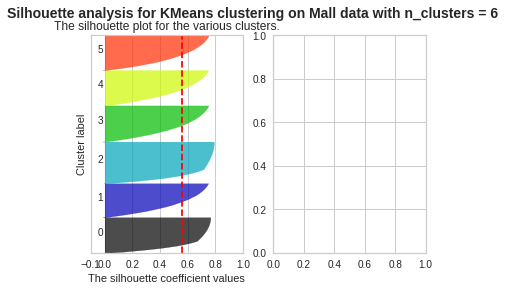

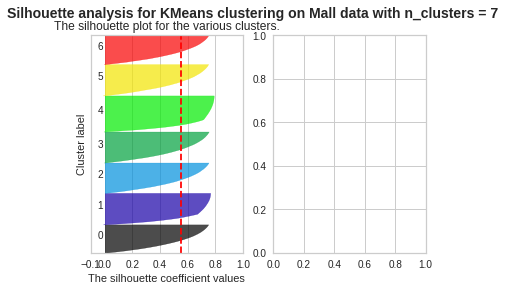

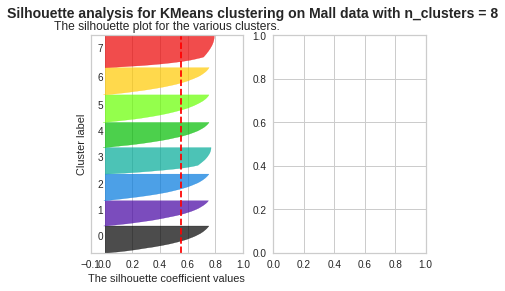

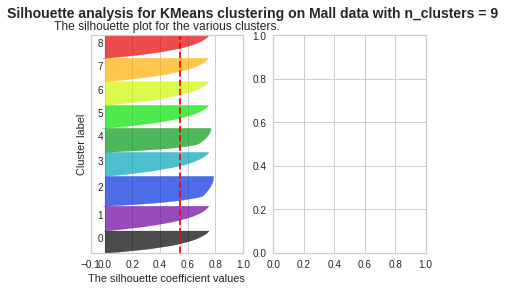

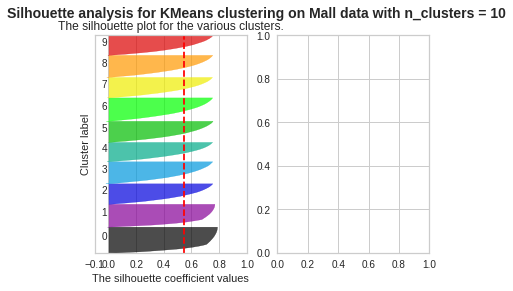

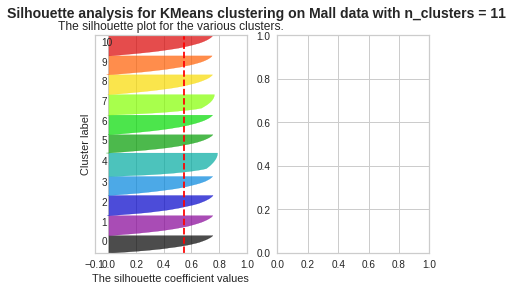

In [16]:
########################  Silhouette
X = df_numeric
range_n_clusters = range(2,12)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=123)
    cluster_labels = clusterer.fit_predict(X)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on Mall data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#13. Answer the following questions: (3-4 sentences)
*   Explain the silhouette score. What are the possible variables?
*   What are the "worst" and the "best" values?
*   How is it calculated?
*   What are a_i and b_i which are required for the calculation of the silhouette score S?


#your answer here:
1. Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette displays a measure of how close each point in one cluster is to points in the neighboring clusters. a result betwen [-1,1]
2. -1 indicates that the sample might be in the wrong cluster, 0 is boundry between two clusters and close to 1 indicates that the point is far from neighboring clusters.

3+4. The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b)




#14. Answer the following questions:


*   Did both methods chose the same best k?
*   If yes, what is the K?
*   If not, Any idea how to choose the best K?



#your answer here:
1. silhouette analysis suggested the best k should be 2, while the elbow suggested k =3
2. since the silhouette anaylsis showed a minor decrease in avg score between 2 and 3 clusters, and the elbow showed a significant improvment in disortion between 2 and 3, i would recommend use k=3.

#Part D: Supervised learning - classification using logistic regression

#15. Using the original dataframe (df), perform the following steps:
i. remove all categorocal coulmns with more than 3 categories.

ii. check for missing values (NAs)

iii. if there are missing values remove them

iv. convert all categorical columns to numerical.


In [17]:
df_reduced_2 = df.drop(columns=['id','name','orbiting_body','sentry_object'])
# i removed both orbiting_body and sentry_object because there was only one category

In [18]:
X = df_reduced_2.iloc[:,:-1]

#16. Choose a "Y " variable (a column with 2 categories), see instructions:

In [19]:
#Your code here:
Y = df_reduced_2.iloc[:,-1]

In [20]:
Y.value_counts()
# i can see that there is a bias for false ,since the majority of the labels are false

False    81996
True      8840
Name: hazardous, dtype: int64

#17. Perform the following steps:
a. Split your data tp train (80%) and test (20%) using **train_test_split**.

b. Train a logistic regression model using the function **LogisticRegression**  and the function **fit**.

c. Predict the Y variable on the test set using the **predict** function, assign the result to an object named predictions. 

d. Using the **score** function, compute and print the prediction accuracy of the predictions object.

e. Create a confusion matrix using the **confusion_matrix** function and assign the result to an object named cm.

f. Print the confusion matrix as a plot.

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)
print(x_train.shape)
print(y_test)

x_train.head()

(72668, 5)
21345    False
38160    False
77967    False
59271    False
5510     False
         ...  
14524    False
29410    False
73531    False
54894    False
21742    False
Name: hazardous, Length: 18168, dtype: bool


,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
27313,0.172407,0.385514,89649.825548,6.163785e+07,20.94
74835,0.023150,0.051765,32553.175567,6.399271e+06,25.30
67142,0.030518,0.068240,30451.235350,1.931741e+07,24.70
48703,0.027833,0.062236,22368.950899,1.125405e+07,24.90
31033,0.019256,0.043057,23169.060503,4.012498e+07,25.70


In [22]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)

In [23]:
score_train = logisticRegr.score(x_train, y_train)
print(score_train)
score = logisticRegr.score(x_test, y_test)
print(score)
cmatrix = metrics.confusion_matrix(y_test, predictions)
print(cmatrix)

0.9029008642043266
0.9018053720827829
[[16384     0]
 [ 1784     0]]


In [24]:
print("Test matrix:\n" ,classification_report(y_test,predictions))

Test matrix:
               precision    recall  f1-score   support

       False       0.90      1.00      0.95     16384
        True       0.00      0.00      0.00      1784

    accuracy                           0.90     18168
   macro avg       0.45      0.50      0.47     18168
weighted avg       0.81      0.90      0.86     18168



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#18. Answer to the following questions:


*   What is the model accuracy?
*   How many times the model predicted 0 correctly and how many times it predicted 1 correctly?



#your answer here:
1 .the accuracy for the test set was 90%. as we can observe from the confusion matrix, the model gusses "false" for each classification, since the data is baised.
2. it predicts only 0 (false) so in 1784 tines it guessed wrong, in 16384 it gussed right.


#Good Luck!!